mmdetection으로 데이터학습을 통해서 모델을 만들어 봅시다.

https://mmdetection.readthedocs.io/en/latest/2_new_data_model.html



아래의 balloon dataset으로 instance segmentation을 학습해봅시다

https://github.com/matterport/Mask_RCNN/releases

데이터셋을 구글 드라이브에 압축을 풀어줍니다


위의 데이터셋을 COCO dataset으로 변환하여 진행합니다

변환한 json 파일을 불러옵니다 

In [1]:
# 라벨링 json 파일 불러오기

import json

path = '/content/drive/MyDrive/DL 202201/balloon/'

with open(path +"train/train.json", "r") as f:
    anno = json.load(f)

print(anno)

{'images': [{'id': 0, 'width': 2048, 'height': 1536, 'file_name': '34020010494_e5cb88e1c4_k.jpg'}, {'id': 1, 'width': 2048, 'height': 1365, 'file_name': '25899693952_7c8b8b9edc_k.jpg'}, {'id': 2, 'width': 1536, 'height': 2048, 'file_name': '24362039530_b151b41a52_k.jpg'}, {'id': 3, 'width': 1536, 'height': 2048, 'file_name': '18849792632_aad23ad513_k.jpg'}, {'id': 4, 'width': 2048, 'height': 1536, 'file_name': '17178818589_16e58fc1e5_k.jpg'}, {'id': 5, 'width': 2048, 'height': 1363, 'file_name': '17156759330_5af4f5a5b8_k.jpg'}, {'id': 6, 'width': 1895, 'height': 2048, 'file_name': '16435593892_2aa8118f4a_k.jpg'}, {'id': 7, 'width': 2048, 'height': 1536, 'file_name': '15717689633_5f7f78c28e_k.jpg'}, {'id': 8, 'width': 1365, 'height': 2048, 'file_name': '15331928994_d5b82eb368_k.jpg'}, {'id': 9, 'width': 2048, 'height': 1356, 'file_name': '15290896925_884ab33fd3_k.jpg'}, {'id': 10, 'width': 1357, 'height': 2048, 'file_name': '14666848163_8be8e37562_k.jpg'}, {'id': 11, 'width': 2048, 'hei

In [2]:
# mmdetection을 설치합니다. 

!pip install openmim
!mim install mmdet

  Created wheel for openmim: filename=openmim-0.1.5-py2.py3-none-any.whl size=42503 sha256=a67cb5dfc1d694d513ef9968052cf00bb56084da87892dd8d346424edf386ccf
  Stored in directory: /root/.cache/pip/wheels/16/8b/e1/bdebbbc687aa50224a5ce46fe97a040a0c59f92b34bfc750b6
Successfully built openmim
installing mmdet from https://github.com/open-mmlab/mmdetection.git.
Cloning into '/tmp/tmp2qngiuaw/mmdetection'...
remote: Enumerating objects: 24423, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 24423 (delta 18), reused 18 (delta 1), pack-reused 24364
Receiving objects: 100% (24423/24423), 37.55 MiB | 24.73 MiB/s, done.
Resolving deltas: 100% (17064/17064), done.
Note: checking out '73b4e65a6a30435ef6a35f405e3474a4d9cfb234'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another ch

In [3]:
# git clone으로 mmdetection 코드를 복사합니다. mim에서 설치가 되나 tmp 폴더로 설치되어서 사용하기 위운 위치에 추가로 복사
!git clone https://github.com/open-mmlab/mmdetection.git

Cloning into 'mmdetection'...
remote: Enumerating objects: 24423, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 24423 (delta 18), reused 18 (delta 1), pack-reused 24364
Receiving objects: 100% (24423/24423), 37.55 MiB | 23.39 MiB/s, done.
Resolving deltas: 100% (17078/17078), done.


In [4]:
!ls

drive  mmdetection  sample_data


In [5]:
%cd mmdetection

/content/mmdetection


In [6]:
!ls

CITATION.cff  docs	   model-index.yml  requirements      setup.py
configs       LICENSE	   pytest.ini	    requirements.txt  tests
demo	      MANIFEST.in  README.md	    resources	      tools
docker	      mmdet	   README_zh-CN.md  setup.cfg


In [7]:
!ls configs

albu_example	 empirical_attention  libra_rcnn	   retinanet
atss		 faster_rcnn	      lvis		   rpn
autoassign	 fast_rcnn	      mask2former	   sabl
_base_		 fcos		      maskformer	   scnet
carafe		 foveabox	      mask_rcnn		   scratch
cascade_rcnn	 fpg		      ms_rcnn		   seesaw_loss
cascade_rpn	 free_anchor	      nas_fcos		   selfsup_pretrain
centernet	 fsaf		      nas_fpn		   simple_copy_paste
centripetalnet	 gcnet		      openimages	   solo
cityscapes	 gfl		      paa		   sparse_rcnn
common		 ghm		      pafpn		   ssd
cornernet	 gn		      panoptic_fpn	   strong_baselines
dcn		 gn+ws		      pascal_voc	   swin
dcnv2		 grid_rcnn	      pisa		   timm_example
deepfashion	 groie		      point_rend	   tood
deformable_detr  guided_anchoring     pvt		   tridentnet
detectors	 hrnet		      queryinst		   vfnet
detr		 htc		      regnet		   wider_face
double_heads	 instaboost	      reppoints		   yolact
dyhead		 lad		      res2net		   yolo
dynamic_rcnn	 ld		      resnest		   yolof
efficientnet	 legacy_1.x	

model zoo에서 mask rcnn을 선택하여 config 파일 및 pre-trained model을 활용합니다. 

https://github.com/open-mmlab/mmdetection/tree/master/configs/mask_rcnn

colab에서 config 파일 편집이 불편하기 때문에 
로컬에서 작성 후 업로드 하여 사용하겠습니다. 

```
# 선택 모델의 config 파일을 불러옴
_base_ = [
    '../configs/mask_rcnn/mask_rcnn_r50_fpn_mstrain-poly_3x_coco.py'
]

# model의 클래스 개수를 데이터에 맞도록 변경
model = dict(
    roi_head=dict(
        bbox_head=dict(num_classes=1),
        mask_head=dict(num_classes=1)))

# 데이터 경로를 저장
dataset_type = 'CocoDataset'  # 데이터셋 형태
path_ = '/content/drive/MyDrive/DL 202201/balloon'
num_classes = 1
classes = ('balloon',)
data = dict(
    train= dict(
        dataset=dict(
        img_prefix=path_+'/train/',
        classes=classes,
        ann_file=path_+'/train/train.json')),
    val=dict(
        img_prefix=path_+'/val/',
        classes=classes,
        ann_file=path_+'/val/val.json'),
    test=dict(
        img_prefix=path_+'/val/',
        classes=classes,
        ann_file=path_+'/val/val.json'))

# We can use the pre-trained Mask RCNN model to obtain higher performance
#load_from = 'mask_rcnn_r50_fpn_mstrain-poly_3x_coco_20210524_201154-21b550bb.pth'
```


In [8]:
!ls configs/mask_rcnn

mask_rcnn_r101_caffe_fpn_1x_coco.py
mask_rcnn_r101_caffe_fpn_mstrain-poly_3x_coco.py
mask_rcnn_r101_fpn_1x_coco.py
mask_rcnn_r101_fpn_2x_coco.py
mask_rcnn_r101_fpn_mstrain-poly_3x_coco.py
mask_rcnn_r50_caffe_c4_1x_coco.py
mask_rcnn_r50_caffe_fpn_1x_coco.py
mask_rcnn_r50_caffe_fpn_mstrain_1x_coco.py
mask_rcnn_r50_caffe_fpn_mstrain-poly_1x_coco.py
mask_rcnn_r50_caffe_fpn_mstrain-poly_2x_coco.py
mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco.py
mask_rcnn_r50_caffe_fpn_poly_1x_coco_v1.py
mask_rcnn_r50_fpn_1x_coco.py
mask_rcnn_r50_fpn_2x_coco.py
mask_rcnn_r50_fpn_fp16_1x_coco.py
mask_rcnn_r50_fpn_mstrain-poly_3x_coco.py
mask_rcnn_r50_fpn_poly_1x_coco.py
mask_rcnn_x101_32x4d_fpn_1x_coco.py
mask_rcnn_x101_32x4d_fpn_2x_coco.py
mask_rcnn_x101_32x4d_fpn_mstrain-poly_3x_coco.py
mask_rcnn_x101_32x8d_fpn_1x_coco.py
mask_rcnn_x101_32x8d_fpn_mstrain-poly_1x_coco.py
mask_rcnn_x101_32x8d_fpn_mstrain-poly_3x_coco.py
mask_rcnn_x101_64x4d_fpn_1x_coco.py
mask_rcnn_x101_64x4d_fpn_2x_coco.py
mask_rcnn_x101_64x

In [15]:
from google.colab import files
file_uploaded = files.upload()

Saving mask_rcnn_config.py to mask_rcnn_config.py


In [16]:
!mv mask_rcnn_config.py configs/mask_rcnn_config.py

In [11]:
!ls

CITATION.cff  docs	   model-index.yml  requirements      setup.py
configs       LICENSE	   pytest.ini	    requirements.txt  tests
demo	      MANIFEST.in  README.md	    resources	      tools
docker	      mmdet	   README_zh-CN.md  setup.cfg


In [12]:
!wget https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_fpn_mstrain-poly_3x_coco_20210524_201154-21b550bb.pth

--2022-05-12 13:14:55--  https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_fpn_mstrain-poly_3x_coco_20210524_201154-21b550bb.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.28
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177868694 (170M) [application/octet-stream]
Saving to: ‘mask_rcnn_r50_fpn_mstrain-poly_3x_coco_20210524_201154-21b550bb.pth’

mask_rcnn_r50_fpn_m 100%[===================>] 169.63M  8.77MB/s    in 20s     

2022-05-12 13:15:16 (8.30 MB/s) - ‘mask_rcnn_r50_fpn_mstrain-poly_3x_coco_20210524_201154-21b550bb.pth’ saved [177868694/177868694]



In [13]:
!ls

CITATION.cff
configs
demo
docker
docs
LICENSE
MANIFEST.in
mask_rcnn_r50_fpn_mstrain-poly_3x_coco_20210524_201154-21b550bb.pth
mmdet
model-index.yml
pytest.ini
README.md
README_zh-CN.md
requirements
requirements.txt
resources
setup.cfg
setup.py
tests
tools


train.py를 활용하여 훈련해봅시다

In [18]:
# 실행 옵션 확인
!python tools/train.py -h

usage: train.py [-h] [--work-dir WORK_DIR] [--resume-from RESUME_FROM]
                [--auto-resume] [--no-validate]
                [--gpus GPUS | --gpu-ids GPU_IDS [GPU_IDS ...] | --gpu-id
                GPU_ID] [--seed SEED] [--diff-seed] [--deterministic]
                [--options OPTIONS [OPTIONS ...]]
                [--cfg-options CFG_OPTIONS [CFG_OPTIONS ...]]
                [--launcher {none,pytorch,slurm,mpi}]
                [--local_rank LOCAL_RANK] [--auto-scale-lr]
                config

Train a detector

positional arguments:
  config                train config file path

optional arguments:
  -h, --help            show this help message and exit
  --work-dir WORK_DIR   the dir to save logs and models
  --resume-from RESUME_FROM
                        the checkpoint file to resume from
  --auto-resume         resume from the latest checkpoint automatically
  --no-validate         whether not to evaluate the checkpoint during training
  --gpus GPUS           (Depr

In [17]:
# config 파일을 살펴봅시다

!python tools/train.py configs/mask_rcnn_config.py


/usr/local/lib/python3.7/dist-packages/mmdet/utils/setup_env.py:39: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/usr/local/lib/python3.7/dist-packages/mmdet/utils/setup_env.py:49: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
2022-05-12 13:17:58,244 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.7.13 (default, Apr 24 2022, 01:04:09) [GCC 7.5.0]
CUDA available: True
GPU 0: Tesla K80
CUDA_HOME: /usr/local/cuda
NVCC: Cuda compilat

In [19]:
!python tools/test.py -h

usage: test.py [-h] [--work-dir WORK_DIR] [--out OUT] [--fuse-conv-bn]
               [--gpu-ids GPU_IDS [GPU_IDS ...]] [--gpu-id GPU_ID]
               [--format-only] [--eval EVAL [EVAL ...]] [--show]
               [--show-dir SHOW_DIR] [--show-score-thr SHOW_SCORE_THR]
               [--gpu-collect] [--tmpdir TMPDIR]
               [--cfg-options CFG_OPTIONS [CFG_OPTIONS ...]]
               [--options OPTIONS [OPTIONS ...]]
               [--eval-options EVAL_OPTIONS [EVAL_OPTIONS ...]]
               [--launcher {none,pytorch,slurm,mpi}] [--local_rank LOCAL_RANK]
               config checkpoint

MMDet test (and eval) a model

positional arguments:
  config                test config file path
  checkpoint            checkpoint file

optional arguments:
  -h, --help            show this help message and exit
  --work-dir WORK_DIR   the directory to save the file containing evaluation
                        metrics
  --out OUT             output result file in pickle format
  --f

In [21]:
!mkdir 'result'

In [22]:
#평가하기
!python tools/test.py configs/mask_rcnn_config.py /content/mmdetection/work_dirs/mask_rcnn_config/latest.pth --eval segm --show --show-dir /result

/usr/local/lib/python3.7/dist-packages/mmdet/utils/setup_env.py:39: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/usr/local/lib/python3.7/dist-packages/mmdet/utils/setup_env.py:49: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
load checkpoint from local path: /content/mmdetection/work_dirs/mask_rcnn_config/latest.pth
[>>] 13/13, 1.2 task/s, elapsed: 11s, ETA:     0s
Evaluating segm...
/usr/local/lib/python3.7/dist-packages/m

In [24]:
!ls 

CITATION.cff
configs
demo
docker
docs
LICENSE
MANIFEST.in
mask_rcnn_r50_fpn_mstrain-poly_3x_coco_20210524_201154-21b550bb.pth
mmdet
model-index.yml
pytest.ini
README.md
README_zh-CN.md
requirements
requirements.txt
resources
result
setup.cfg
setup.py
tests
tools
work_dirs


학습 모델로 예측하기


In [33]:
from mmdet.apis import init_detector, inference_detector
import mmcv

# Specify the path to model config and checkpoint file
config_file = 'configs/mask_rcnn_config.py'
checkpoint_file = '/content/mmdetection/work_dirs/mask_rcnn_config/latest.pth'

# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

# test a single image and show the results
img = '/content/drive/MyDrive/DL 202201/balloon/val/14898532020_ba6199dd22_k.jpg'  # or img = mmcv.imread(img), which will only load it once
result = inference_detector(model, img)


load checkpoint from local path: /content/mmdetection/work_dirs/mask_rcnn_config/latest.pth


/content/mmdetection/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


In [34]:
result

([array([[6.13130859e+02, 7.01445847e+01, 8.33789734e+02, 3.55674835e+02,
          9.98687804e-01],
         [5.24490479e+02, 3.22598969e+02, 7.54280701e+02, 6.08313171e+02,
          9.98300016e-01],
         [1.26816605e+02, 4.17180450e+02, 2.00606369e+02, 4.98922791e+02,
          9.98183072e-01],
         [1.96356873e+03, 4.57080383e+02, 2.01643921e+03, 5.13926819e+02,
          9.71977711e-01],
         [1.91868286e+03, 4.66141144e+02, 1.96366455e+03, 5.16578125e+02,
          3.78657401e-01],
         [5.17386780e+02, 3.53929260e+02, 5.58708252e+02, 4.21752319e+02,
          1.99257463e-01]], dtype=float32)],
 [[array([[False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          ...,
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False]]),
   ar

In [35]:
model.show_result(img, result, out_file='result.jpg') 

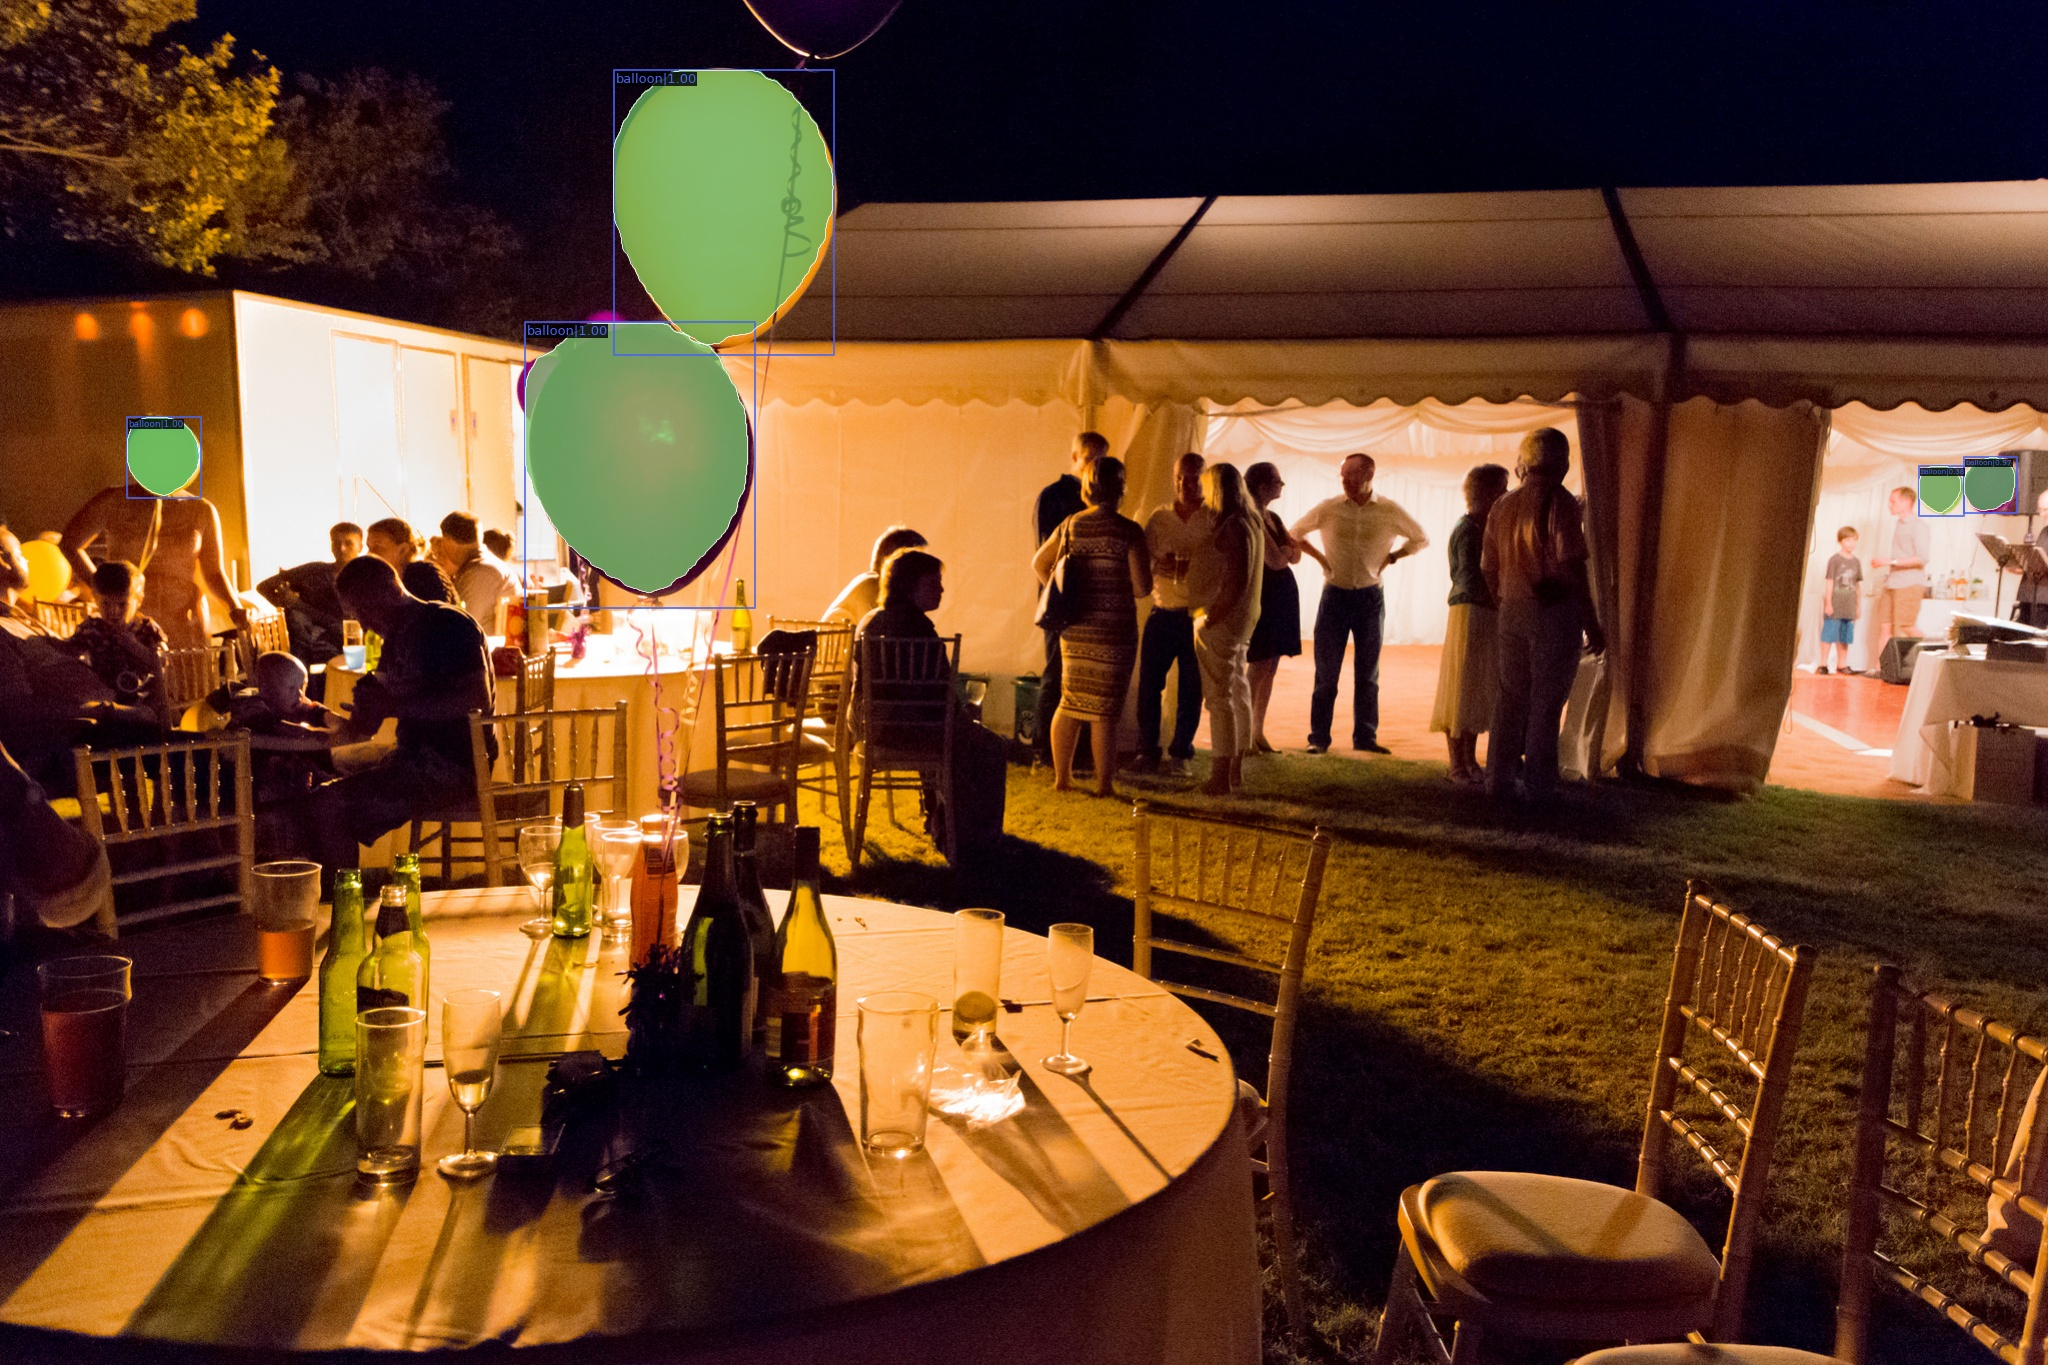

In [36]:
from IPython.display import Image
Image(filename='result.jpg') 